MINC 2500 Tutorial : train a small network

THALES DMS France, 2019, Atelier ALLOHA du 15/01/2019

Import lib

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Database

In [2]:
train_data_dir = '/home/user/privatedata/MINC2500/minc-2500/train'
validation_data_dir = '/home/user/privatedata/MINC2500/minc-2500/test'
# 1001 training samples for each of the 23 classes
nb_train_samples = 1001*23
# 1499 validation samples for each of the 23 classes
nb_validation_samples = 1499*23

Images dimensions

In [3]:
img_width, img_height = 150, 150
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Training parameters

In [4]:
epochs = 20
batch_size = 64

CNN architecture

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(23))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        4624      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
__________

Compiler

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Data

In [7]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 23023 images belonging to 23 classes.
Found 34477 images belonging to 23 classes.


Training

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
359/359 [==============================] - 108s 301ms/step - loss: 2.9154 - acc: 0.1395 - val_loss: 2.6637 - val_acc: 0.2343
Epoch 2/20
359/359 [==============================] - 106s 295ms/step - loss: 2.6060 - acc: 0.2394 - val_loss: 2.3903 - val_acc: 0.3010
Epoch 3/20
359/359 [==============================] - 106s 294ms/step - loss: 2.4235 - acc: 0.2898 - val_loss: 2.2769 - val_acc: 0.3386
Epoch 4/20
359/359 [==============================] - 106s 295ms/step - loss: 2.3167 - acc: 0.3220 - val_loss: 2.2973 - val_acc: 0.3358
Epoch 5/20
359/359 [==============================] - 106s 294ms/step - loss: 2.2332 - acc: 0.3424 - val_loss: 2.1670 - val_acc: 0.3588
Epoch 6/20
359/359 [==============================] - 106s 295ms/step - loss: 2.1534 - acc: 0.3613 - val_loss: 2.1384 - val_acc: 0.3744
Epoch 7/20
359/359 [==============================] - 106s 295ms/step - loss: 2.0999 - acc: 0.3810 - val_loss: 2.0845 - val_acc: 0.3831
Epoch 8/20
359/359 [============================

Plot

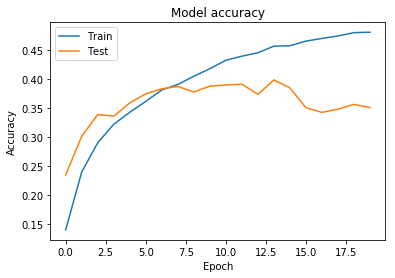

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

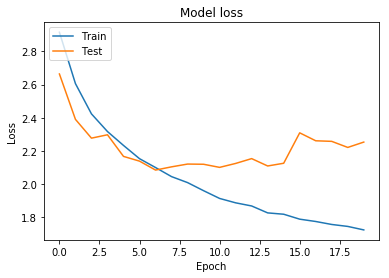

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Save model

In [11]:
model.save_weights('smallnet.h5')